## Data_analysys

In [29]:
import pandas as pd

User = pd.read_csv('EVIO_history_01-06-2022_31-05-2023.csv', sep=";" )
User = User[['Start date','Stop date','Duration (min)', 'Total Energy (kWh)']]

print(User)

             Start date           Stop date Duration (min) Total Energy (kWh)
0    05/31/2023 | 13:46  05/31/2023 | 19:08        321,983               19,2
1    05/31/2023 | 13:46  05/31/2023 | 13:46            0,1                  0
2    05/30/2023 | 09:32  05/30/2023 | 13:29          237,1              45,13
3    05/26/2023 | 18:51  05/26/2023 | 19:13          22,55              28,57
4    05/24/2023 | 18:42  05/24/2023 | 19:17           35,3              25,98
..                  ...                 ...            ...                ...
112  07/01/2022 | 09:33  07/01/2022 | 09:33          0,183                  0
113  06/15/2022 | 18:51  06/15/2022 | 18:57          6,167               3,48
114  06/15/2022 | 18:37  06/15/2022 | 18:49           12,1              14,34
115  06/15/2022 | 15:08  06/15/2022 | 15:51         43,467              41,18
116  06/07/2022 | 13:52  06/07/2022 | 17:36        224,517              40,19

[117 rows x 4 columns]


In [10]:
# Vamos converter as colunas de data de início e fim para o formato de data e hora do pandas
User['Start date'] = pd.to_datetime(User['Start date'], format='%m/%d/%Y | %H:%M')
User['Stop date'] = pd.to_datetime(User['Stop date'], format='%m/%d/%Y | %H:%M')
# Convertendo os valores de energia para o formato numérico adequado
User['Total Energy (kWh)'] = User['Total Energy (kWh)'].str.replace(',', '.').astype(float)

# Adicionando uma coluna para o dia da semana
User['Day of Week'] = User['Start date'].dt.day_name()


# Agrupando os dados por dia da semana e calculando a soma da energia para cada dia
energy_by_day = User.groupby('Day of Week')['Total Energy (kWh)'].sum()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
energy_by_day.plot(kind='bar', color='skyblue')
plt.title('Energia por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Energia Total (kWh)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Criar as 24 colunas para as horas do dia
for i in range(24):
    hour_column = f'Hour_{i:02d}'
    User[hour_column] = 0

# Iterar sobre as linhas e marcar as horas em que houve carregamento como 1
for index, row in User.iterrows():
    start_hour = row['Start date'].hour
    stop_hour = row['Stop date'].hour
    
    for i in range(start_hour, stop_hour + 1):
        hour_column = f'Hour_{i:02d}'
        User.at[index, hour_column] = 1


#User['Last'] = User['Total Energy (kWh)'].shift(1)

# Remover as linhas em que 'Total Energy (kWh)' é inferior a 1
User = User[User['Total Energy (kWh)'] >= 1]

# Resetar o índice do dataframe após remover as linhas
User.reset_index(drop=True, inplace=True)


# Remover as primeiras 7 linhas
User = User.drop(index=range(1))


# Exibir o dataframe com as novas colunas
print(User.head())

# Supondo que o nome do seu DataFrame seja 'User' e você deseja salvá-lo como 'user_data.csv'
#User.to_csv('user_data.csv', index=False)



NameError: name 'plt' is not defined

In [ ]:
# Criando uma nova coluna 'Weekday' que contém o dia da semana
User['Weekday'] = User['Start date'].dt.day_name()

#print(User)

weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

User['Weekday'] = User['Weekday'].map(weekday_mapping)

print(User.head())

# Calculando a correlação entre a energia e o dia da semana
correlation = User['Total Energy (kWh)'].corr(User['Weekday'])

print(f"A correlação entre a energia e o dia da semana é: {correlation}")



           Start date           Stop date Duration (min)  Total Energy (kWh)  \
1 2023-05-30 09:32:00 2023-05-30 13:29:00          237,1               45.13   
2 2023-05-26 18:51:00 2023-05-26 19:13:00          22,55               28.57   
3 2023-05-24 18:42:00 2023-05-24 19:17:00           35,3               25.98   
4 2023-05-08 08:38:00 2023-05-08 12:58:00        260,017               47.33   
5 2023-05-02 09:38:00 2023-05-02 13:27:00        229,267               43.58   

  Day of Week  Hour_00  Hour_01  Hour_02  Hour_03  Hour_04  ...  Hour_15  \
1     Tuesday        0        0        0        0        0  ...        0   
2      Friday        0        0        0        0        0  ...        0   
3   Wednesday        0        0        0        0        0  ...        0   
4      Monday        0        0        0        0        0  ...        0   
5     Tuesday        0        0        0        0        0  ...        0   

   Hour_16  Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_

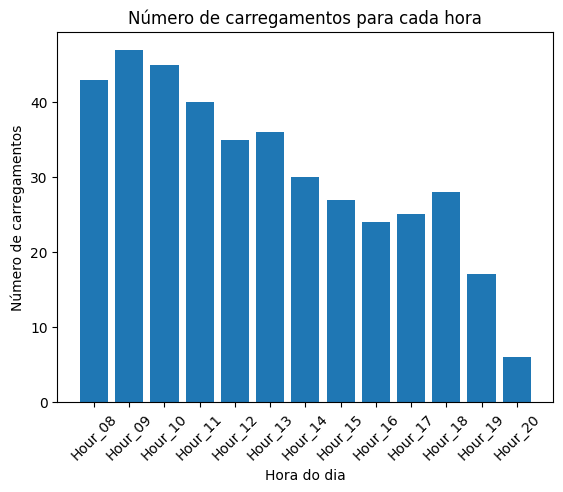

Model: Random Forest
Mean Squared Error: 153.94789961154453
R-squared (R2): 0.12448039260925081

Model: XGBoost
Mean Squared Error: 221.97959958744264
R-squared (R2): -0.26242379642690095

Model: Gradient Boosting
Mean Squared Error: 183.2914460499284
R-squared (R2): -0.04239976828941394

A equação da regressão linear é: y = 23.24572928765158 + [  3.63788142 -21.7668736   25.94399238  -3.26733968   8.87055623
   1.74769499   1.37044574  -0.65251775  14.56073012  -2.45386694
  -9.08568839   9.12023993  -5.66063312  -0.07872746]x
Model: Linear Regression
Mean Squared Error: 218.25809913394806
R-squared (R2): -0.2412591905818744



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Features e TARGET_VARIABLE
#X = User.drop(columns=['Start date', 'Stop date', 'Duration (min)', 'Total Energy (kWh)'])
X = User[['Hour_08', 'Hour_09', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Weekday']]

X = pd.get_dummies(X)

import matplotlib.pyplot as plt

# Somando o número de carregamentos para cada hora
hour_counts = User[['Hour_08', 'Hour_09', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20']].sum()


# Plotando o histograma
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel('Hora do dia')
plt.ylabel('Número de carregamentos')
plt.title('Número de carregamentos para cada hora')
plt.xticks(rotation=45)
plt.show()


y = User['Total Energy (kWh)']


# Divisão do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
'Random Forest': RandomForestRegressor(),
'XGBoost': XGBRegressor(),
'Gradient Boosting': GradientBoostingRegressor(),
'Linear Regression': LinearRegression(),
#'Logistic Regression': LogisticRegression()
}

    # Loop through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    if model_name == 'Linear Regression':
        # Coeficiente angular (inclinação)
        beta_1 = model.coef_

        # Coeficiente linear (intercepto)
        beta_0 = model.intercept_

        print(f"A equação da regressão linear é: y = {beta_0} + {beta_1}x")
        


    # Make predictions
    predictions = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Print metrics
    print(f"Model: {model_name}")
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared (R2): {r2}')
    print()

## Data preparation

In [30]:
# Convertendo as colunas de data para o formato de data
#User['Start date'] = pd.to_datetime(User['Start date'])
#User['Stop date'] = pd.to_datetime(User['Stop date'])

# Convertendo as colunas de data para o formato de data especificado
User['Start date'] = pd.to_datetime(User['Start date'], format='%m/%d/%Y | %H:%M')
User['Stop date'] = pd.to_datetime(User['Stop date'], format='%m/%d/%Y | %H:%M')


# Criando uma nova coluna 'Date' que contém apenas a data (sem a hora)
User['Date'] = User['Start date'].dt.date

# Convertendo os valores de energia para o formato numérico adequado
User['Total Energy (kWh)'] = User['Total Energy (kWh)'].str.replace(',', '.').astype(float)

# Agrupando os dados pela coluna 'Date' e somando os valores de 'Total Energy (kWh)'
daily_energy_sum = User.groupby('Date')['Total Energy (kWh)'].sum().reset_index()

print(daily_energy_sum)

          Date  Total Energy (kWh)
0   2022-06-07              40.190
1   2022-06-15              59.000
2   2022-07-01               0.000
3   2022-07-14               0.000
4   2022-07-19              30.419
..         ...                 ...
78  2023-05-08              47.330
79  2023-05-24              25.980
80  2023-05-26              28.570
81  2023-05-30              45.130
82  2023-05-31              19.200

[83 rows x 2 columns]


In [32]:
# Convertendo a coluna 'Date' em 'daily_energy_sum' para datetime
daily_energy_sum['Date'] = pd.to_datetime(daily_energy_sum['Date'])

# Reiniciando o índice
daily_energy_sum.reset_index(drop=True, inplace=True)

# Criando uma nova coluna 'Weekday' que contém o dia da semana
daily_energy_sum['Weekday'] = daily_energy_sum['Date'].dt.day_name()

print(daily_energy_sum)

weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

daily_energy_sum['Weekday'] = daily_energy_sum['Weekday'].map(weekday_mapping)
print(daily_energy_sum)


         Date  Total Energy (kWh)    Weekday
0  2022-06-07              40.190    Tuesday
1  2022-06-15              59.000  Wednesday
2  2022-07-01               0.000     Friday
3  2022-07-14               0.000   Thursday
4  2022-07-19              30.419    Tuesday
..        ...                 ...        ...
78 2023-05-08              47.330     Monday
79 2023-05-24              25.980  Wednesday
80 2023-05-26              28.570     Friday
81 2023-05-30              45.130    Tuesday
82 2023-05-31              19.200  Wednesday

[83 rows x 3 columns]
         Date  Total Energy (kWh)  Weekday
0  2022-06-07              40.190        2
1  2022-06-15              59.000        3
2  2022-07-01               0.000        5
3  2022-07-14               0.000        4
4  2022-07-19              30.419        2
..        ...                 ...      ...
78 2023-05-08              47.330        1
79 2023-05-24              25.980        3
80 2023-05-26              28.570        5
81 2023

In [25]:
# Criando um intervalo de datas que cubra todo o período de interesse
date_range = pd.date_range(start=User['Date'].min(), end=User['Date'].max(), freq='D')

# Criando um DataFrame com o intervalo de datas
date_df = pd.DataFrame({'Date': date_range})

# Renomeando a coluna 'Date' para 'Date_new'
date_df.rename(columns={'Date': 'Date_new'}, inplace=True)

# Convertendo a coluna 'Date' em 'daily_energy_sum' para datetime
daily_energy_sum['Date'] = pd.to_datetime(daily_energy_sum['Date'])

# Mesclando os DataFrames usando merge
merged_df = pd.merge(date_df, daily_energy_sum, left_on='Date_new', right_on='Date', how='left')

# Preenchendo os valores ausentes na coluna 'Total Energy (kWh)' com zero
merged_df['Total Energy (kWh)'].fillna(0, inplace=True)
merged_df = merged_df.drop(columns=['Date'])
merged_df.rename(columns={'Date_new': 'Date'}, inplace=True)

print(merged_df)

          Date  Total Energy (kWh)
0   2022-06-07               40.19
1   2022-06-08                0.00
2   2022-06-09                0.00
3   2022-06-10                0.00
4   2022-06-11                0.00
..         ...                 ...
354 2023-05-27                0.00
355 2023-05-28                0.00
356 2023-05-29                0.00
357 2023-05-30               45.13
358 2023-05-31               19.20

[359 rows x 2 columns]


In [26]:
# Reiniciando o índice
merged_df.reset_index(drop=True, inplace=True)

# Criando uma nova coluna 'Weekday' que contém o dia da semana
merged_df['Weekday'] = merged_df['Date'].dt.day_name()

print(merged_df)

weekday_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

merged_df['Weekday'] = merged_df['Weekday'].map(weekday_mapping)
print(merged_df)


          Date  Total Energy (kWh)    Weekday
0   2022-06-07               40.19    Tuesday
1   2022-06-08                0.00  Wednesday
2   2022-06-09                0.00   Thursday
3   2022-06-10                0.00     Friday
4   2022-06-11                0.00   Saturday
..         ...                 ...        ...
354 2023-05-27                0.00   Saturday
355 2023-05-28                0.00     Sunday
356 2023-05-29                0.00     Monday
357 2023-05-30               45.13    Tuesday
358 2023-05-31               19.20  Wednesday

[359 rows x 3 columns]
          Date  Total Energy (kWh)  Weekday
0   2022-06-07               40.19        2
1   2022-06-08                0.00        3
2   2022-06-09                0.00        4
3   2022-06-10                0.00        5
4   2022-06-11                0.00        6
..         ...                 ...      ...
354 2023-05-27                0.00        6
355 2023-05-28                0.00        7
356 2023-05-29              

In [42]:
# Supondo que seu DataFrame seja chamado de daily_energy_sum e tenha a coluna 'Total Energy (kWh)'

# Loop através das linhas do DataFrame
for i in range(7, len(daily_energy_sum)):
    # Seleciona os valores de energia das últimas 7 linhas, incluindo a linha atual
    energy_current = daily_energy_sum.iloc[i]['Total Energy (kWh)']
    energy_previous = daily_energy_sum.iloc[i-7:i]['Total Energy (kWh)']
    # Calcula as correlações entre os valores de energia atuais e os valores das 7 linhas anteriores
    correlations = energy_previous.corr(pd.Series([energy_current] * 7))
    print(correlations)
  # Adiciona as correlações como novas colunas ao DataFrame
    daily_energy_sum.loc[i, 'Correlation Lag 1'] = correlations
    daily_energy_sum.loc[i, 'Correlation Lag 2'] = correlations
    daily_energy_sum.loc[i, 'Correlation Lag 3'] = correlations
    daily_energy_sum.loc[i, 'Correlation Lag 4'] = correlations
    daily_energy_sum.loc[i, 'Correlation Lag 5'] = correlations
    daily_energy_sum.loc[i, 'Correlation Lag 6'] = correlations
    daily_energy_sum.loc[i, 'Correlation Lag 7'] = correlations

#print(daily_energy_sum)



nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


c:\Users\miguel.preto\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\miguel.preto\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\miguel.preto\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\miguel.preto\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\miguel.preto\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\miguel.preto\AppData\Local\Programs\Python\Python31

In [ ]:
# Subtraindo 7 dias da coluna 'Date' em 'daily_energy_sum' para obter a data da semana passada
merged_df['Energy_last_week'] = merged_df['Date'] - pd.DateOffset(weeks=1)

# Mapeando os valores de energia da semana anterior
previous_week_energy = merged_df.groupby('Weekday')['Total Energy (kWh)'].shift()

# Adicionando a coluna 'Previous Week Energy' ao DataFrame
merged_df['Energy_last_week'] = previous_week_energy

# Removendo linhas com NaN na coluna 'Previous Week Energy'
#merged_df = merged_df.dropna()

print(merged_df)

# Remover as primeiras 7 linhas
dataset_cleaned = merged_df.drop(index=range(7))

# Mostrar o resultado
print(dataset_cleaned)




          Date  Total Energy (kWh)  Weekday  Energy_last_week
0   2022-06-07               40.19        2               NaN
1   2022-06-08                0.00        3               NaN
2   2022-06-09                0.00        4               NaN
3   2022-06-10                0.00        5               NaN
4   2022-06-11                0.00        6               NaN
..         ...                 ...      ...               ...
354 2023-05-27                0.00        6              0.00
355 2023-05-28                0.00        7              0.00
356 2023-05-29                0.00        1              0.00
357 2023-05-30               45.13        2              0.00
358 2023-05-31               19.20        3             25.98

[359 rows x 4 columns]
          Date  Total Energy (kWh)  Weekday  Energy_last_week
7   2022-06-14                0.00        2             40.19
8   2022-06-15               59.00        3              0.00
9   2022-06-16                0.00        4   

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features e TARGET_VARIABLE
X = merged_df[['Weekday', 'Max Correlation Energy (kWh)']]
y = merged_df['Total Energy (kWh)']

# Divisão do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
'Random Forest': RandomForestRegressor(),
'XGBoost': XGBRegressor(),
'Gradient Boosting': GradientBoostingRegressor(),
'Linear Regression': LinearRegression()
}

    # Loop through each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Print metrics
    print(f"Model: {model_name}")
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared (R2): {r2}')
    print()

Model: Random Forest
Mean Squared Error: 296.63979979058047
R-squared (R2): 0.11263170962783908

Model: XGBoost
Mean Squared Error: 297.1698101893095
R-squared (R2): 0.11104623653309031

Model: Gradient Boosting
Mean Squared Error: 297.1703735198167
R-squared (R2): 0.11104455138622393

Model: Linear Regression
Mean Squared Error: 301.97325314772036
R-squared (R2): 0.09667721737613844



In [78]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Features e TARGET_VARIABLE
X = merged_df[['Weekday']]
y = merged_df['Total Energy (kWh)']

# Divisão do dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados (é uma boa prática para redes neurais)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construção do modelo de rede neural
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Camada de saída para uma tarefa de regressão
])

# Compilação do modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinamento do modelo
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2)

# previsões no conjunto de teste
predictions = model.predict(X_test_scaled).flatten()

# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2): {r2}')


Epoch 1/100


c:\Users\miguel.preto\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 - 1s - 177ms/step - loss: 472.4719 - val_loss: 264.7386
Epoch 2/100
8/8 - 0s - 22ms/step - loss: 353.6732 - val_loss: 261.1430
Epoch 3/100
8/8 - 0s - 11ms/step - loss: 399.4406 - val_loss: 257.2027
Epoch 4/100
8/8 - 0s - 11ms/step - loss: 374.1735 - val_loss: 252.4600
Epoch 5/100
8/8 - 0s - 11ms/step - loss: 436.3502 - val_loss: 246.5897
Epoch 6/100
8/8 - 0s - 11ms/step - loss: 356.0168 - val_loss: 240.1334
Epoch 7/100
8/8 - 0s - 10ms/step - loss: 371.8542 - val_loss: 233.8854
Epoch 8/100
8/8 - 0s - 11ms/step - loss: 310.8586 - val_loss: 228.5011
Epoch 9/100
8/8 - 0s - 11ms/step - loss: 380.6578 - val_loss: 224.9898
Epoch 10/100
8/8 - 0s - 11ms/step - loss: 300.9453 - val_loss: 221.7602
Epoch 11/100
8/8 - 0s - 10ms/step - loss: 299.7844 - val_loss: 220.8576
Epoch 12/100
8/8 - 0s - 19ms/step - loss: 293.1865 - val_loss: 220.9844
Epoch 13/100
8/8 - 0s - 18ms/step - loss: 283.8304 - val_loss: 220.7774
Epoch 14/100
8/8 - 0s - 13ms/step - loss: 297.5481 - val_loss: 221.1195
Epoch 15/100